In [86]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm


%matplotlib inline


class GaussianSVM:
    def __init__(self, band_width, c):
        self.band_width = band_width
        self.c = c
        self.theta = []
        self.train_x = []

    def fit(self, x, y):
        self.train_x = x
        self.theta = np.ones(len(x)) * 0.1
        eps = 0.1

        K = np.zeros((len(x), len(x)))
        for i in range(len(x)):
            for j in range(len(x)):
                K[i][j] = self._gaussian_kernel(x[i], x[j])
        print(f'K.shape: {K.shape}')
        for _ in tqdm(range(10)):
            diff = np.zeros(self.theta.shape)
            for i in range(len(x)):
                for j in range(len(self.theta)):
                    if 1 - self._func([x[i]]) * y[i] > 0:
                        diff[j] += -y[i] * (self._gaussian_kernel(x[i], x[j])) 
            dec = eps * (self.c * diff + 2 * K.dot(self.theta))
            self.theta -= dec

    def _func(self, x):
        ans = []
        for i in range(len(x)):
            temp = []
            for j in range(len(self.train_x)):
                temp.append(self._gaussian_kernel(x[i], self.train_x[j]))
            ans.append(self.theta.dot(temp))
        return np.array(ans)

    def _gaussian_kernel(self, xi, xj):
        return np.exp(-np.linalg.norm(xi - xj) ** 2 / (2 * (self.band_width ** 2)))

    def predict(self, x):
        return self._func(x)


def create_data(n):
    size = int(n / 2)
    a = np.linspace(0, 4 * np.pi, size)
    u = np.array([a * np.cos(a), (a + np.pi) * np.cos(a)]) + np.random.rand(size)
    v = np.array([a * np.sin(a), (a + np.pi) * np.sin(a)]) + np.random.rand(size)
    x = np.array([u, v])
    y = np.array([np.ones(size), -np.ones(size)])
    return x, y

X.shape: (2, 2, 100)
Y.shape: (2, 100)
data_x.T.shape: (200, 2)
data_y.shape: (200,)






  0%|          | 0/10 [00:00<?, ?it/s]

K.shape: (200, 200)






 10%|█         | 1/10 [01:13<11:00, 73.37s/it]



 20%|██        | 2/10 [02:27<09:47, 73.47s/it]



 30%|███       | 3/10 [03:37<08:28, 72.67s/it]



 40%|████      | 4/10 [04:53<07:21, 73.58s/it]



 50%|█████     | 5/10 [06:11<06:14, 74.84s/it]



 60%|██████    | 6/10 [07:29<05:03, 75.76s/it]



 70%|███████   | 7/10 [08:49<03:51, 77.03s/it]



 80%|████████  | 8/10 [10:10<02:36, 78.39s/it]



 90%|█████████ | 9/10 [11:31<01:19, 79.15s/it]



100%|██████████| 10/10 [12:52<00:00, 79.67s/it]





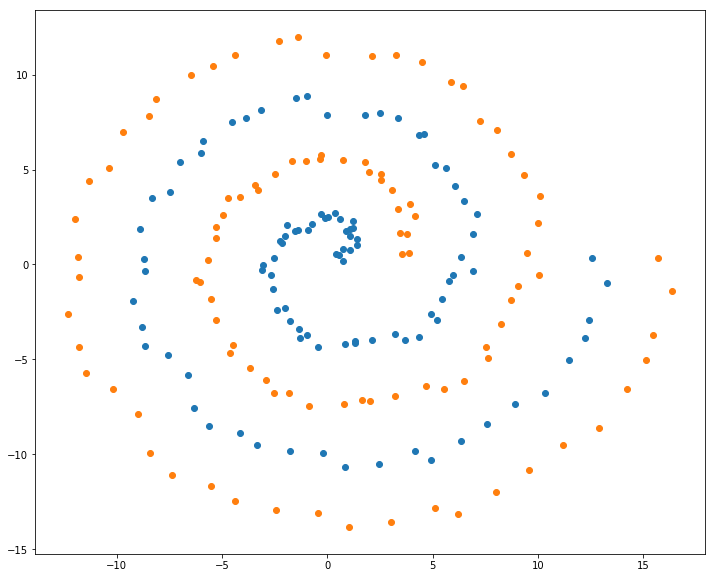

In [82]:
X, Y = create_data(200)
print(f'X.shape: {X.shape}')
print(f'Y.shape: {Y.shape}')
plt.scatter(X[0][0], X[1][0])
plt.scatter(X[0][1], X[1][1])

data_x = np.array([np.hstack([X[0][0], X[0][1]]), np.hstack([X[1][0], X[1][1]])])
data_y = np.hstack(Y)
print(f'data_x.T.shape: {data_x.T.shape}')
print(f'data_y.shape: {data_y.shape}')
gaussianSVM = GaussianSVM(0.3, 0.1)
gaussianSVM.fit(data_x.T, data_y)

In [83]:
X_all = np.zeros((100 * 100, 2))
ranges = np.linspace(-15, 15, 100)
for i in range(100 * 100):
    X_all[i] = np.array([ranges[int(i/100)], ranges[int(i%100)]])
ans = gaussianSVM.predict(X_all)

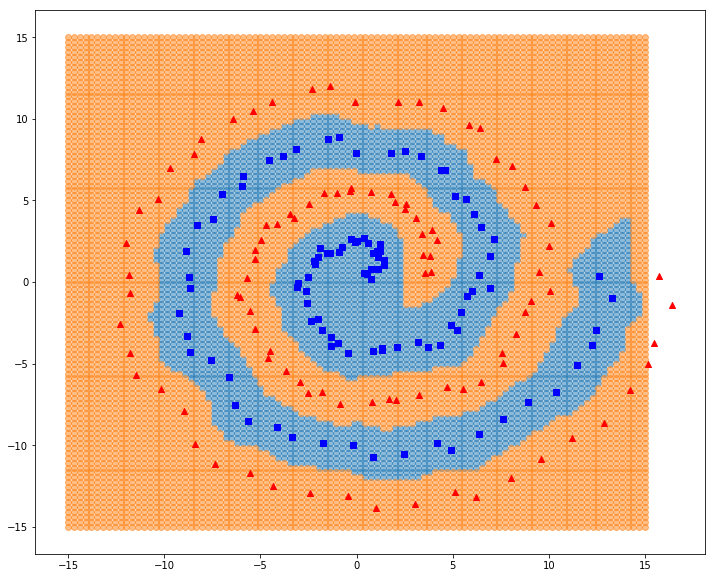

In [84]:
idx1 = np.where(ans > 0)
idx2 = np.where(ans < 0)
plt.rcParams['figure.figsize'] = (12.0, 10.0)
plt.scatter(X_all[idx1][:,0], X_all[idx1][:, 1], alpha=0.5)
plt.scatter(X_all[idx2][:,0], X_all[idx2][:, 1], alpha=0.5)
plt.scatter(X[0][0], X[1][0], marker='s', c="blue")
plt.scatter(X[0][1], X[1][1], marker='^', c="red")